Problem 4 - Semantic Segmentation  : 
* Understand the PASCAL VOC dataset http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#data
* Understand the definition of semantic segmentation 
* Download few images and understand the annotation format 
* Randomly select a few images and plot the annotations
* How will you define IOU for a segmentation task? How mid it different from the IOU for an object detection task?

Semantic segmentation : 

Semantic segmentation is a computer vision task that involves classifying each pixel in an image into a predefined category or class. The primary goal is to assign a label to every pixel, effectively segmenting the image into regions that correspond to different objects or parts of objects.

Importing Libraries :

In [23]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random


Load Segmentation Mask :

In [24]:
def load_segmentation_mask(segmentation_class_dir, image_id):
    mask_path = os.path.join(segmentation_class_dir, f"{image_id}.png")
    if os.path.exists(mask_path):
        mask = Image.open(mask_path).convert("L")
        return np.array(mask)
    else:
        raise FileNotFoundError(f"Segmentation mask for {image_id} not found in {segmentation_class_dir}")

Simulate Predicted Masks :

In [25]:
def simulate_predicted_masks(segmentation_mask):
    predicted_mask = np.zeros_like(segmentation_mask)
    height, width = segmentation_mask.shape
    for y in range(height):
        for x in range(width):
            if segmentation_mask[y, x] != 0 and random.random() > 0.1:
                predicted_mask[y, x] = segmentation_mask[y, x]
            elif segmentation_mask[y, x] == 0 and random.random() < 0.05:
                predicted_mask[y, x] = 1
    return predicted_mask


Calculate IoU :

In [26]:
def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou


Visualize Images and Segmentation Masks :

In [27]:
def visualize_images(images_dir, annotations_dir, segmentation_class_dir):
    image_files = os.listdir(images_dir)
    num_images_to_visualize = 10
    random_image_files = np.random.choice(image_files, num_images_to_visualize, replace=False)
    
    for img_file in random_image_files:
        image_path = os.path.join(images_dir, img_file)
        image = Image.open(image_path).convert("RGB")
        
        image_id = os.path.splitext(img_file)[0]
        annotation_path = os.path.join(annotations_dir, image_id + ".xml")
        
        try:
            segmentation_mask = load_segmentation_mask(segmentation_class_dir, image_id)
        except FileNotFoundError as e:
            print(e)
            continue
        
        predicted_mask = simulate_predicted_masks(segmentation_mask)
        iou = calculate_iou(segmentation_mask, predicted_mask)
        
        draw = ImageDraw.Draw(image)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
            class_name = obj.find('name').text
            draw.text((xmin, ymin), class_name, fill="red")
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.title("Original Image with Bounding Boxes")
        plt.axis('off')
        
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(segmentation_mask, cmap='gray')
        plt.title(f"True Mask: {img_file}")
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(predicted_mask, cmap='gray')
        plt.title(f"Predicted Mask: {img_file}")
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, f"IoU: {iou:.2f}", fontsize=15, ha='center', va='center')
        plt.title("IoU")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()


The above function performs the following steps :

* Randomly Select Images :
  It selects a number of random images from the given directory.

* Load Image and Annotation : 
  For each selected image, it loads the corresponding annotation XML file.

* Load and Simulate Masks :
  It loads the true segmentation mask and generates a simulated predicted mask.

* Calculate IoU : 
  It calculates the IoU between the true and predicted masks.

* Draw Bounding Boxes : 
  It draws the bounding boxes from the annotations on the image.
  
* Visualize:
  It visualizes the original image with bounding boxes, the true mask, the predicted mask, and the IoU value.

Main Function :

Segmentation mask for 2008_008382 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass


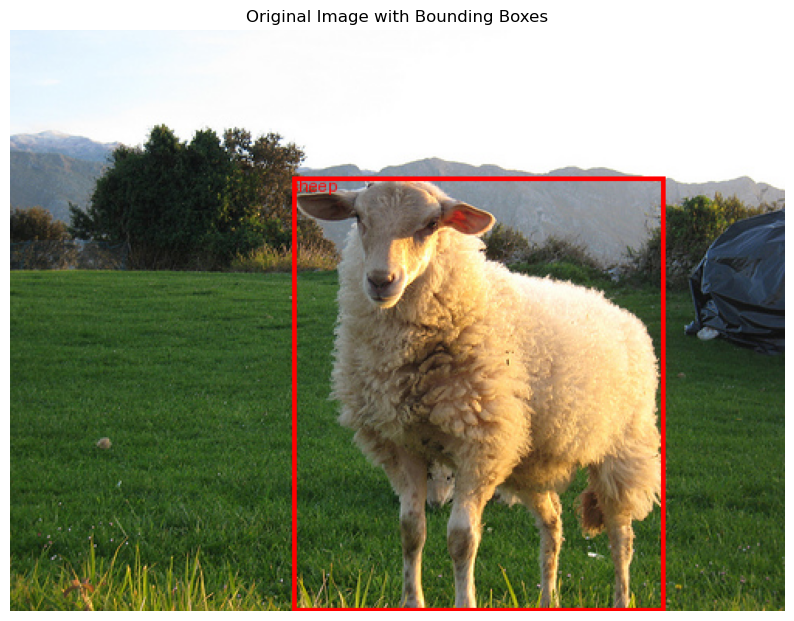

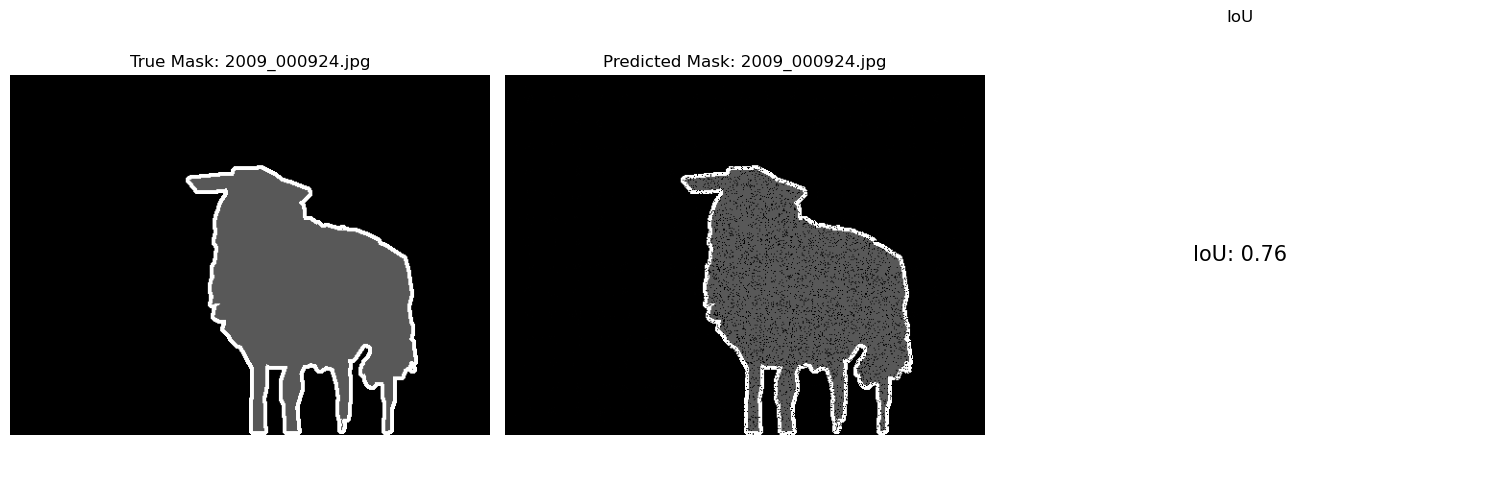

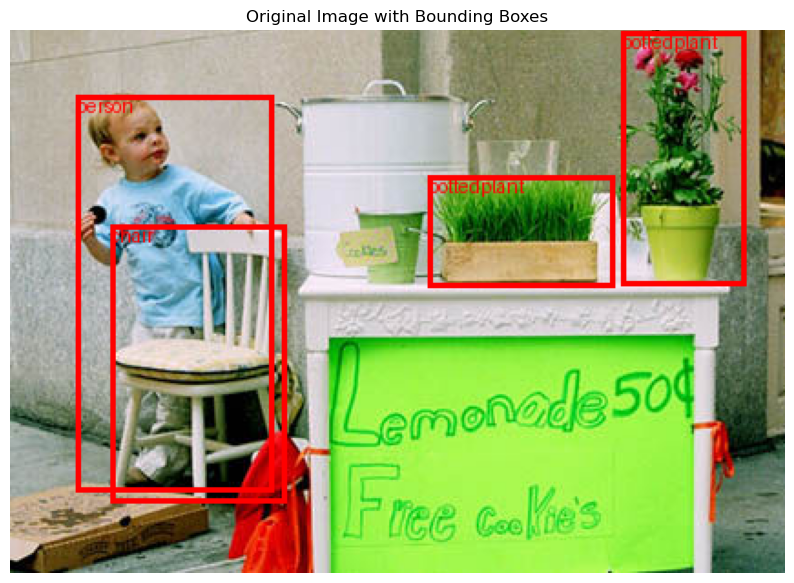

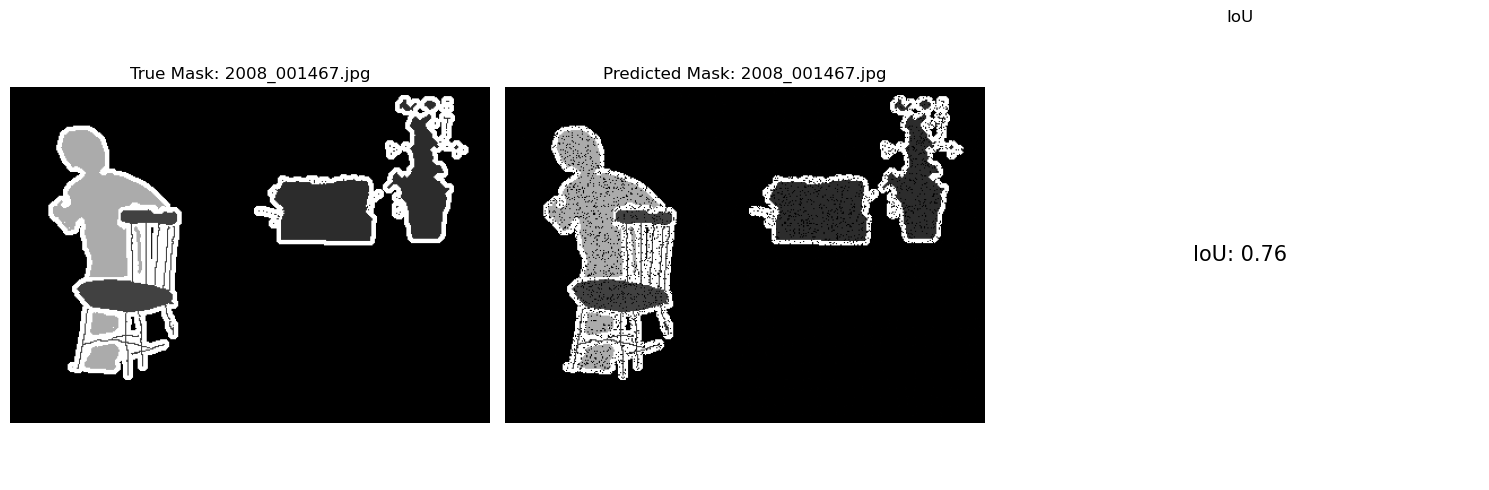

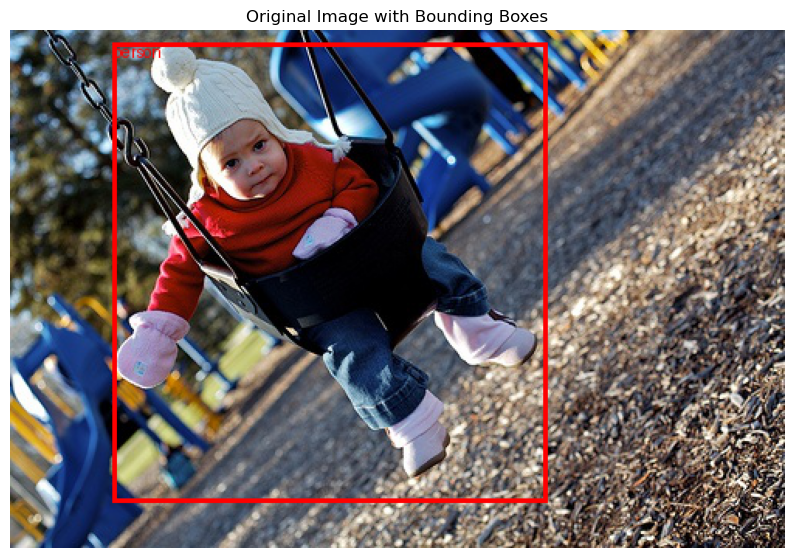

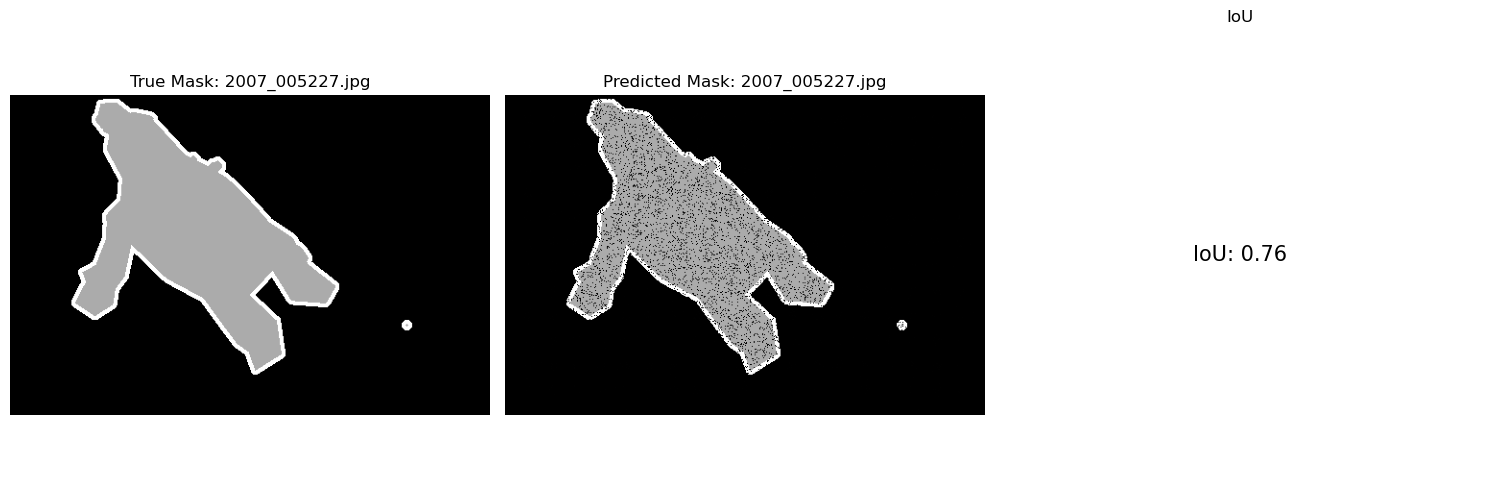

Segmentation mask for 2010_004672 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass
Segmentation mask for 2012_004112 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass
Segmentation mask for 2012_004132 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass
Segmentation mask for 2008_003497 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass
Segmentation mask for 2008_003245 not found in C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012\SegmentationClass


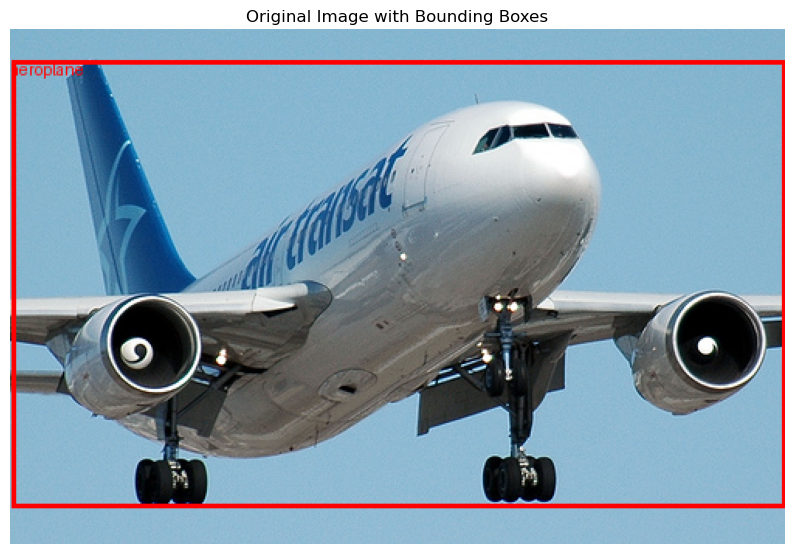

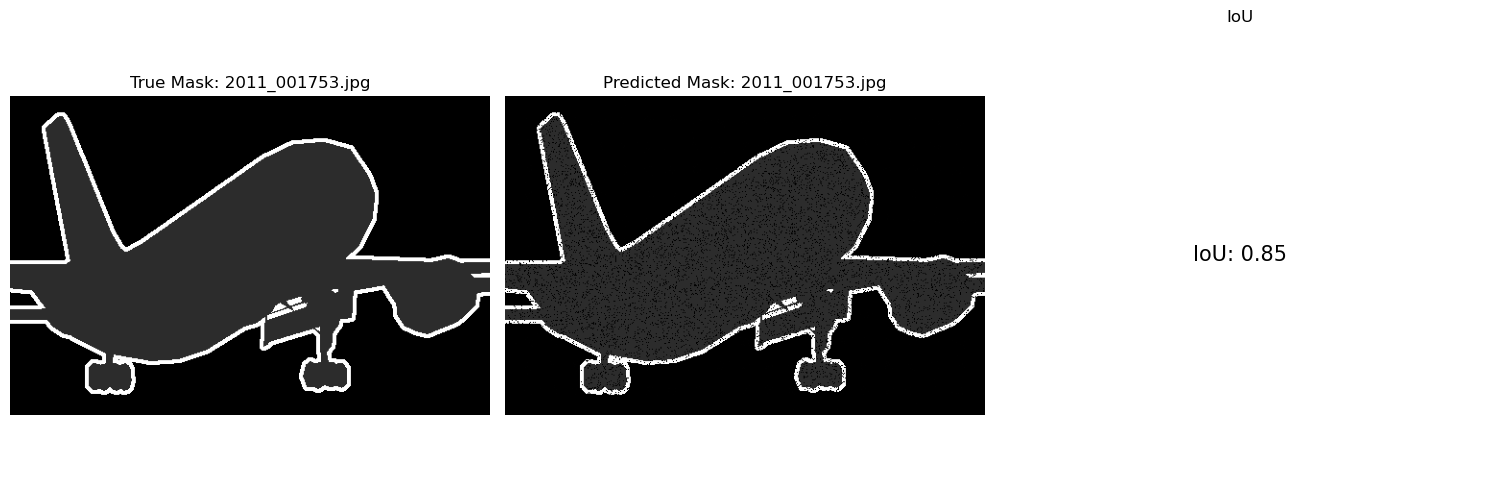

In [40]:
def main():
    data_dir = r"C:\Users\vishn\Downloads\Segmentation\VOCdevkit\VOC2012"
    images_dir = os.path.join(data_dir, "JPEGImages")
    annotations_dir = os.path.join(data_dir, "Annotations")
    segmentation_class_dir = os.path.join(data_dir, "SegmentationClass")
    
    visualize_images(images_dir, annotations_dir, segmentation_class_dir)

if __name__ == "__main__":
    main()
